### Exploratory Data Analysis (EDA) on King County Housing Data in Python

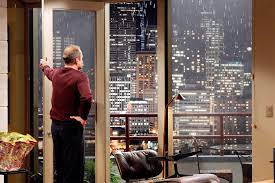

EDA is an extremely powerful method to perform investigations on a given data, thereby discovering patterns, anomalies and confirming/ rejecting
the hypothesis that we made on the data.

### Aim of this notebook 

This notebook contains an example EDA on King County Housing Data. We will go through the datasets, clean it, make 
hypothesis and confirm/reject those hypothesis based on the analysis.

The has been downloaded and is kept in the 'data' folder inside this working directory. More details about the data is given in 
Github (https://github.com/haritha-1234/EDA_project/blob/main/assignment.md). 

### The stakeholders
A stakeholder (Buyer/Seller) has to be chosen from the table given in the above repository in Github

- My stakeholder was Jacob Philips, a buyer.
- He has Unlimited Budget, 4+ bathrooms or smaller house nearby, big lot (tennis court & pool), golf, historic, no waterfront  

### Setup

Import all the needed libraries for this EDA

In [1]:
#Import warning so that it can be included in ignore
import warnings
warnings.filterwarnings("ignore")

#import all libraries for calculations and plotting 
import pandas as pd
import numpy as np
import datetime
import statistics
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding your data 

In [2]:
#Import the data needed for the EDA and see the data in general
king_county_df = pd.read_csv('data/King_County_House_Prices_dataset.csv')
king_county_df.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.000         3      1.000         1180   
1  6414100192   12/9/2014 538000.000         3      2.250         2570   
2  5631500400   2/25/2015 180000.000         2      1.000          770   
3  2487200875   12/9/2014 604000.000         4      3.000         1960   
4  1954400510   2/18/2015 510000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650   1.000         NaN 0.000  ...      7        1180            0.0   
1      7242   2.000       0.000 0.000  ...      7        2170          400.0   
2     10000   1.000       0.000 0.000  ...      6         770            0.0   
3      5000   1.000       0.000 0.000  ...      7        1050          910.0   
4      8080   1.000       0.000 0.000  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0     1955         0.000    98178 47.511 -122.257           1340        5650  
1     1951      1991.000    98125 47.721 -122.319           1690        7639  
2     1933           NaN    98028 47.738 -122.233           2720        8062  
3     1965         0.000    98136 47.521 -122.393           1360        5000  
4     1987         0.000    98074 47.617 -122.045           1800        7503  

[5 rows x 21 columns]

In [3]:
#Get more information on the data types of each columns
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Get the mean of each column:
king_county_df.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count      21597.000   21597.000 21597.000  21597.000    21597.000   
mean  4580474287.771  540296.574     3.373      2.116     2080.322   
std   2876735715.748  367368.140     0.926      0.769      918.106   
min      1000102.000   78000.000     1.000      0.500      370.000   
25%   2123049175.000  322000.000     3.000      1.750     1430.000   
50%   3904930410.000  450000.000     3.000      2.250     1910.000   
75%   7308900490.000  645000.000     4.000      2.500     2550.000   
max   9900000190.000 7700000.000    33.000      8.000    13540.000   

         sqft_lot    floors  waterfront      view  condition     grade  \
count   21597.000 21597.000   19221.000 21534.000  21597.000 21597.000   
mean    15099.409     1.494       0.008     0.234      3.410     7.658   
std     41412.637     0.540       0.087     0.766      0.651     1.173   
min       520.000     1.000       0.000     0.000      1.000     3.000   
25%      5040.000     1.000       0.000     0.000      3.000     7.000   
50%      7618.000     1.500       0.000     0.000      3.000     7.000   
75%     10685.000     2.000       0.000     0.000      4.000     8.000   
max   1651359.000     3.500       1.000     4.000      5.000    13.000   

       sqft_above  yr_built  yr_renovated   zipcode       lat      long  \
count   21597.000 21597.000     17755.000 21597.000 21597.000 21597.000   
mean     1788.597  1971.000        83.637 98077.952    47.560  -122.214   
std       827.760    29.375       399.946    53.513     0.139     0.141   
min       370.000  1900.000         0.000 98001.000    47.156  -122.519   
25%      1190.000  1951.000         0.000 98033.000    47.471  -122.328   
50%      1560.000  1975.000         0.000 98065.000    47.572  -122.231   
75%      2210.000  1997.000         0.000 98118.000    47.678  -122.125   
max      9410.000  2015.000      2015.000 98199.000    47.778  -121.315   

       sqft_living15  sqft_lot15  
count      21597.000   21597.000  
mean        1986.620   12758.284  
std          685.230   27274.442  
min          399.000     651.000  
25%         1490.000    5100.000  
50%         1840.000    7620.000  
75%         2360.000   10083.000  
max         6210.000  871200.000

### Initial hypothesis/ assumptions about datasets

From the different column names given in the overall dataset and keeping my stakeholder in mind, the assumptions that I made are:

1) Are the houses built in later 90's has more price? If not, what can be the reason?

2) How many houses are there with more than 4+ bathrooms?

3) Where are these houses located? near or far from waterfront? 

### Cleaning the datasets

Convert the date to a datetime format

In [5]:
king_county_df['date'] = pd.to_datetime(king_county_df.date)
#king_county_df['date'] = king_county_df['date'].dt.to_period('M')
#king_county_df['date'] = king_county_df['date'].astype(str)
king_county_df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.000         3      1.000         1180   
1  6414100192 2014-12-09 538000.000         3      2.250         2570   
2  5631500400 2015-02-25 180000.000         2      1.000          770   
3  2487200875 2014-12-09 604000.000         4      3.000         1960   
4  1954400510 2015-02-18 510000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650   1.000         NaN 0.000  ...      7        1180            0.0   
1      7242   2.000       0.000 0.000  ...      7        2170          400.0   
2     10000   1.000       0.000 0.000  ...      6         770            0.0   
3      5000   1.000       0.000 0.000  ...      7        1050          910.0   
4      8080   1.000       0.000 0.000  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0     1955         0.000    98178 47.511 -122.257           1340        5650  
1     1951      1991.000    98125 47.721 -122.319           1690        7639  
2     1933           NaN    98028 47.738 -122.233           2720        8062  
3     1965         0.000    98136 47.521 -122.393           1360        5000  
4     1987         0.000    98074 47.617 -122.045           1800        7503  

[5 rows x 21 columns]

We see that the dataset consists of unknown values(like '?') and NaN values which has to be set to 0.0. Also the date has to be converted in to a 
datetime format

In [6]:
#Replace NaN values with 0.0
king_county_df = king_county_df.fillna(0)
#replace columns with'?' with 0.0
king_county_df = king_county_df.replace(to_replace='?', value='0.0')
king_county_df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.000         3      1.000         1180   
1  6414100192 2014-12-09 538000.000         3      2.250         2570   
2  5631500400 2015-02-25 180000.000         2      1.000          770   
3  2487200875 2014-12-09 604000.000         4      3.000         1960   
4  1954400510 2015-02-18 510000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650   1.000       0.000 0.000  ...      7        1180            0.0   
1      7242   2.000       0.000 0.000  ...      7        2170          400.0   
2     10000   1.000       0.000 0.000  ...      6         770            0.0   
3      5000   1.000       0.000 0.000  ...      7        1050          910.0   
4      8080   1.000       0.000 0.000  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0     1955         0.000    98178 47.511 -122.257           1340        5650  
1     1951      1991.000    98125 47.721 -122.319           1690        7639  
2     1933         0.000    98028 47.738 -122.233           2720        8062  
3     1965         0.000    98136 47.521 -122.393           1360        5000  
4     1987         0.000    98074 47.617 -122.045           1800        7503  

[5 rows x 21 columns]

### Correlation matrix:<br>
Higher value(close to 1) of correlation coefficient means those two features are highly correlated. I am interested in the <br>
correlation of size of the house(sqft_living) with the year in which the houses were built and the price of those houses

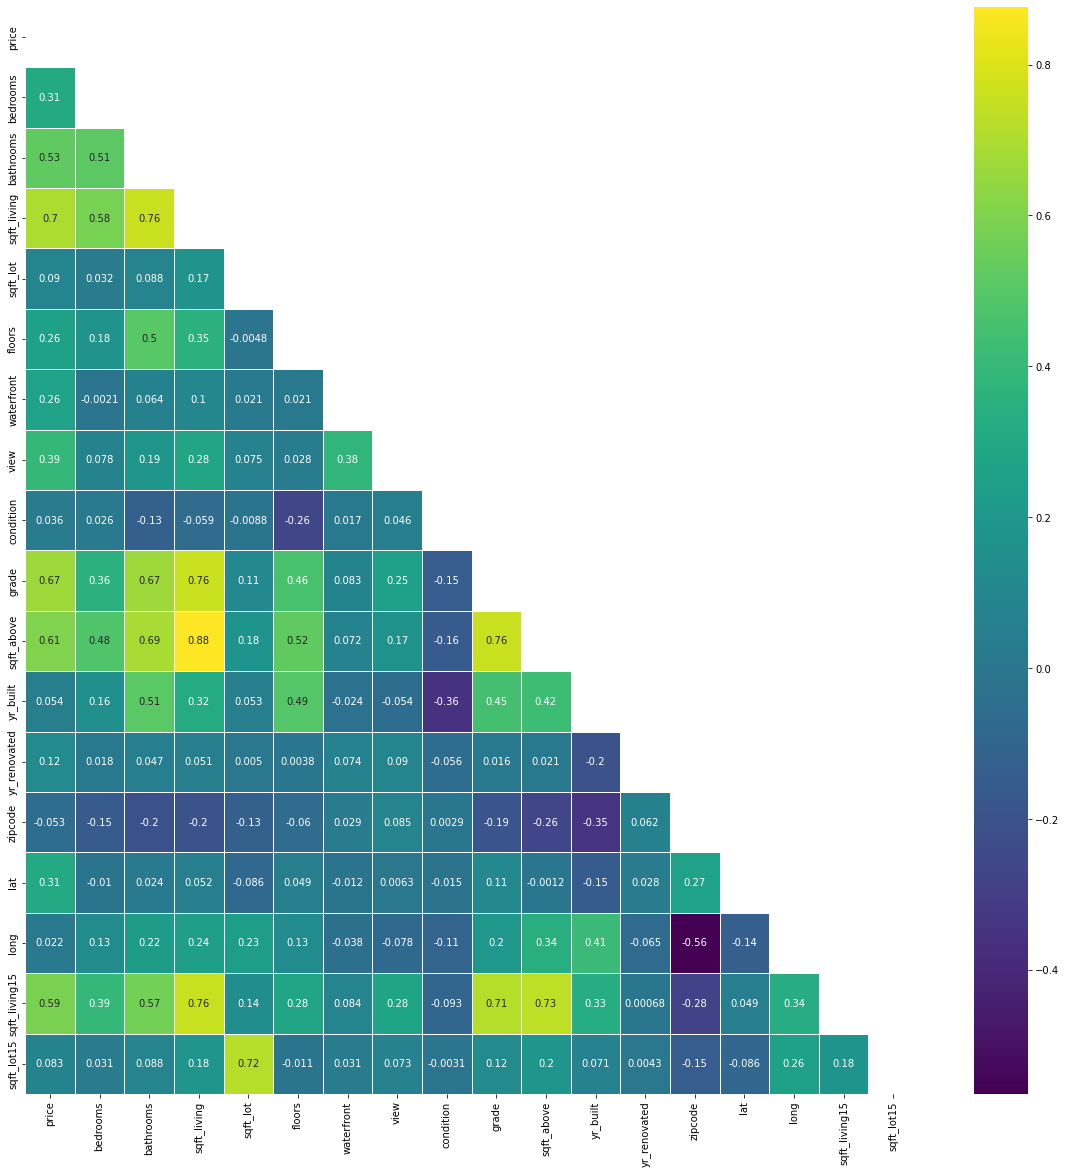

In [7]:
#plotting the correlation matrix on the given data to see how each column correlates to another
county_corr_data = king_county_df.drop(['id',], axis = 1)
plt.figure(figsize=(20, 20))
matrix = np.triu(county_corr_data.corr())
sns.heatmap(county_corr_data.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="viridis");

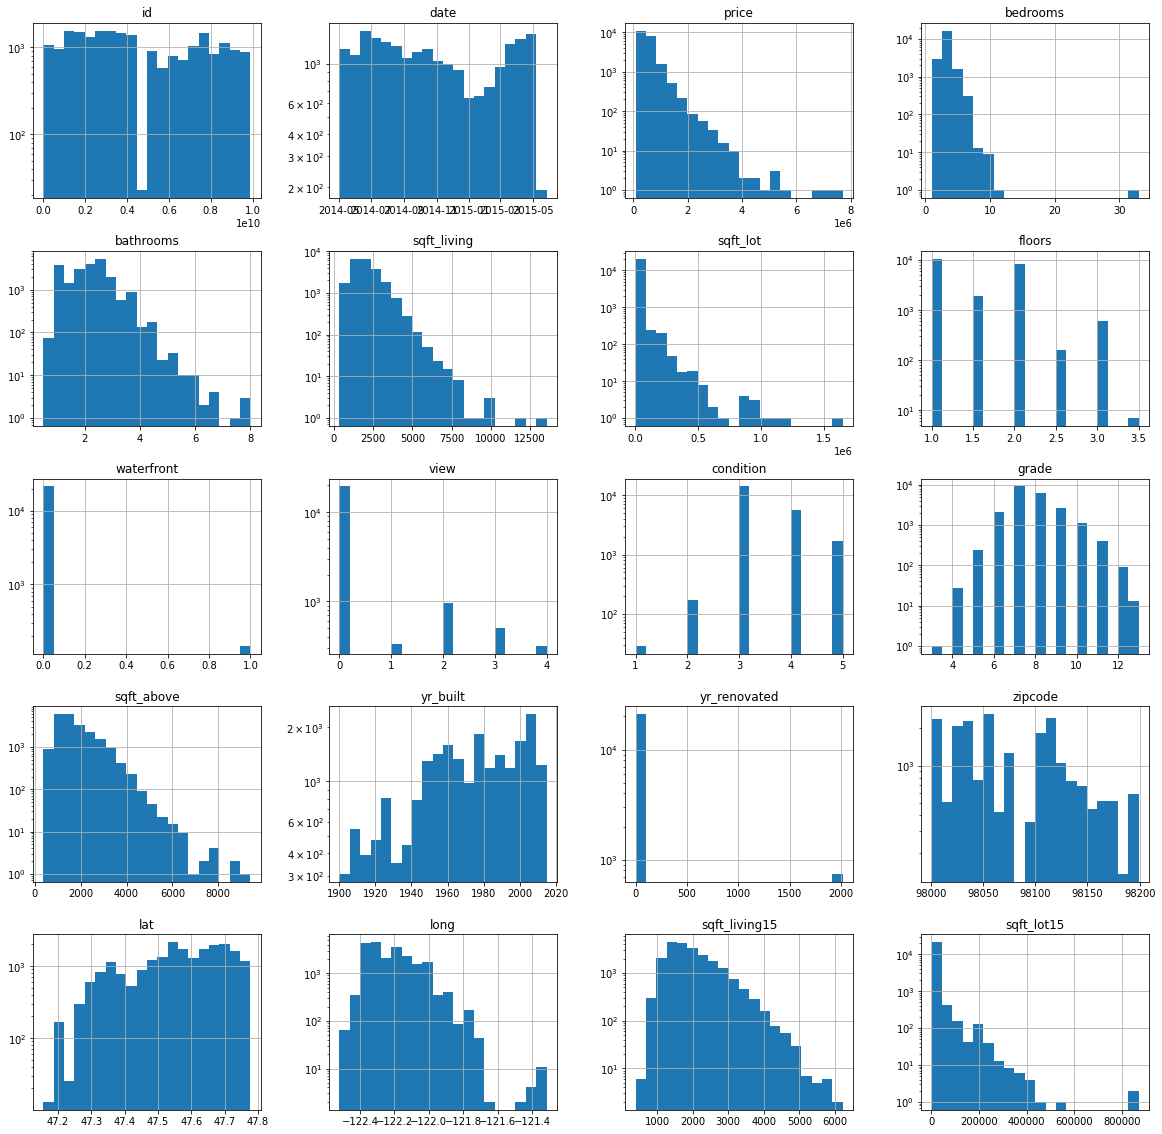

In [8]:
#visualizing different columns in histograms
king_county_df.hist(figsize = (20,20), bins=20, log=True) 
plt.show()

From the above distributions, We can see that the data such as price, bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, yr_built, zipcode, lat, long, sqft_living15 and sqft_lot15 are uniformly distributed. Whereas there are gaps in the data such as floors, grade, waterfront, view, condition and yr_renovated. 

Lets start with the uniformly distributed datasets which are our interest for this analysis. i.e price, size(sqft_living) and the year in which the houses were built

### Average price of the houses

In the below cells, we calculate the average price of the houses per the year they have built

In [9]:
# Question 1: 
# We have to group by the houses that was sold in each of this year and then get their price and count each of them 
county_price = king_county_df[['yr_built', 'price']].groupby(['yr_built', 'price']).size().to_frame('count').reset_index()
county_price

yr_built       price  count
0          1900  130000.000      1
1          1900  169900.000      1
2          1900  179000.000      1
3          1900  192500.000      1
4          1900  199999.000      1
...         ...         ...    ...
17338      2015 1290000.000      2
17339      2015 1550000.000      1
17340      2015 1700000.000      1
17341      2015 1800000.000      1
17342      2015 2000000.000      1

[17343 rows x 3 columns]

In [10]:
# Look at the unique years the houses has been built 
median_year = pd.unique(king_county_df['yr_built'])
print(pd.unique(king_county_df['yr_built']))
print(len(pd.unique(king_county_df['yr_built'])))

[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]
116


### Plot

First we look if there is any relation between the Year_built and the price of the houses. Plot a 2D histogram (Heatmap) using those two 
columns with count as the weight of the heatmap

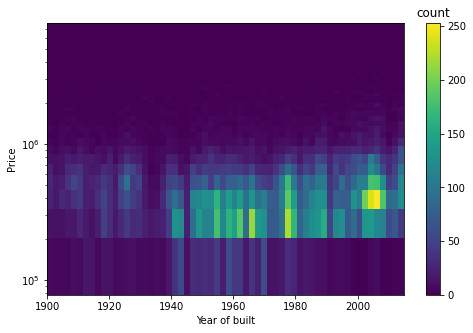

In [11]:
#Heat map of Year of built with the Target prediction price of the houses
plt.hist2d(county_price['yr_built'], county_price['price'], weights=county_price['count'], bins=(60, 60))
plt.yscale('log')
plt.xlabel('Year of built')
plt.ylabel('Price')
clb = plt.colorbar()
clb.ax.set_title('count')
plt.show()

Conclusion:

We can see that there are more houses with higher target prediction price in later 20's compared to early 90's which  <br> 
actually make sense! But at the same time there are some fluctuations in the early years where we can see quite some number of houses with greater price. What can be the reason?

Calculating the Average price of the houses to confirm what we see from the heatmap below:

In [12]:
#calculate the price of the house per count and store it as 'price_x_count'
county_price.eval('price_x_count = price * count', inplace=True)
#From the above dataframe, we groupby the year_built to get the number of such year and then add them using their count
no_of_year = county_price.groupby('yr_built')['count'].sum()
#Here we calculate the average price of the houses using the no_of_year we got from above 
price_avg = county_price.groupby('yr_built')['price_x_count'].sum()/no_of_year
#Round the values 
#price_avg = round(price_avg, -3)
price_avg#.head(50)

yr_built
1900   581536.632
1901   557108.345
1902   673192.593
1903   480958.196
1904   583867.756
          ...    
2011   544648.385
2012   527436.982
2013   678599.582
2014   683792.685
2015   759970.947
Length: 116, dtype: float64

Here we plot the Average price of the houses with the year it was built using a bar plot in Matplotlib

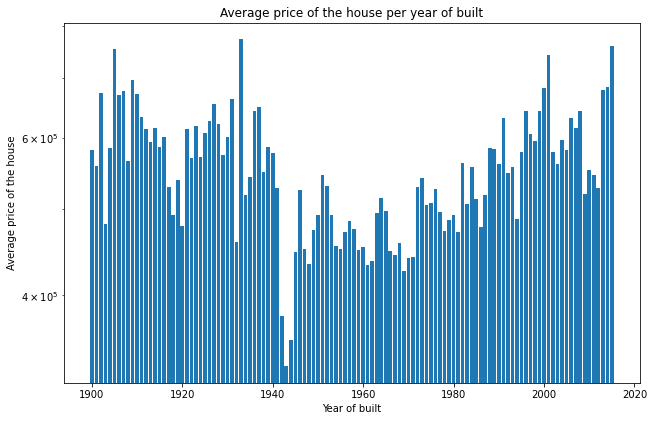

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
year = pd.unique(king_county_df['yr_built'].sort_values(ascending=True))
ax.bar(year, price_avg)
plt.title('Average price of the house per year of built')
plt.xlabel('Year of built')
plt.ylabel('Average price of the house')
plt.yscale('log')
plt.show()


### Conclusion

My assumption before plotting was that the prediction target price of the houses will be highly related to the year 
in which the houses were built. Then the houses that were built in early 90's will have less price compared to the 
ones that were built in late 2000. From the above plot, we don't see any direct relationship between the year of built 
of the house and the average price of those houses. 
The data is highly fluctuating. This can be due to various reasons:
- The houses built in early 90's can be larger or have similar size compared to the ones built in 2000. 
- May be the houses that were built in early 90's were extensively renovated later and have similar 
  amenities that today's buyers are seeking
More analysis have to be done to get a clear trend

### Let's see the correlation of the features of the houses with the price <br>
Thinking about the possible reason behind the above behaviour, let's check how the features of each of these houses such as area, <br> 
no. of rooms et.. are related to the price of the house

In [14]:
#convert the price to log10 scale so that its easy to visualize
king_county_df['price(log)'] = np.log10(king_county_df['price'])
king_county_df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.000         3      1.000         1180   
1  6414100192 2014-12-09 538000.000         3      2.250         2570   
2  5631500400 2015-02-25 180000.000         2      1.000          770   
3  2487200875 2014-12-09 604000.000         4      3.000         1960   
4  1954400510 2015-02-18 510000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650   1.000       0.000 0.000  ...        1180            0.0   
1      7242   2.000       0.000 0.000  ...        2170          400.0   
2     10000   1.000       0.000 0.000  ...         770            0.0   
3      5000   1.000       0.000 0.000  ...        1050          910.0   
4      8080   1.000       0.000 0.000  ...        1680            0.0   

   yr_built yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
0      1955        0.000    98178 47.511 -122.257           1340        5650   
1      1951     1991.000    98125 47.721 -122.319           1690        7639   
2      1933        0.000    98028 47.738 -122.233           2720        8062   
3      1965        0.000    98136 47.521 -122.393           1360        5000   
4      1987        0.000    98074 47.617 -122.045           1800        7503   

   price(log)  
0       5.346  
1       5.731  
2       5.255  
3       5.781  
4       5.708  

[5 rows x 22 columns]

In [15]:
#Grouping by the number of each of the features of the house and price and then counting them and adding to a data frame
bath_county = king_county_df[['bathrooms', 'price(log)']].groupby(['bathrooms', 'price(log)']).size().to_frame('count_bath').reset_index()
bed_county = king_county_df[['bedrooms', 'price(log)']].groupby(['bedrooms', 'price(log)']).size().to_frame('count_bed').reset_index()
sqft_living_county = king_county_df[['sqft_living', 'price(log)']].groupby(['sqft_living', 'price(log)']).size().to_frame('count_sqft_living').reset_index()
sqft_lot_county = king_county_df[['sqft_lot', 'price(log)']].groupby(['sqft_lot', 'price(log)']).size().to_frame('count_sqft_lot').reset_index()
sqft_living_above_county = king_county_df[['sqft_above', 'price(log)']].groupby(['sqft_above', 'price(log)']).size().to_frame('count_sqft_above').reset_index()
sqft_living15_county = king_county_df[['sqft_living15', 'price(log)']].groupby(['sqft_living15', 'price(log)']).size().to_frame('count_living15').reset_index()
sqft_lot15 = king_county_df[['sqft_lot15', 'price(log)']].groupby(['sqft_lot15', 'price(log)']).size().to_frame('count_lot15').reset_index()
sqft_living_county.head()

sqft_living  price(log)  count_sqft_living
0          370       5.441                  1
1          380       5.389                  1
2          390       5.389                  1
3          410       5.512                  1
4          420       5.360                  1

### Plot <br>
Here we plot the correlation of each of the above features of the houses with the prices in log scale

<AxesSubplot:xlabel='price(log)', ylabel='sqft_living15'>

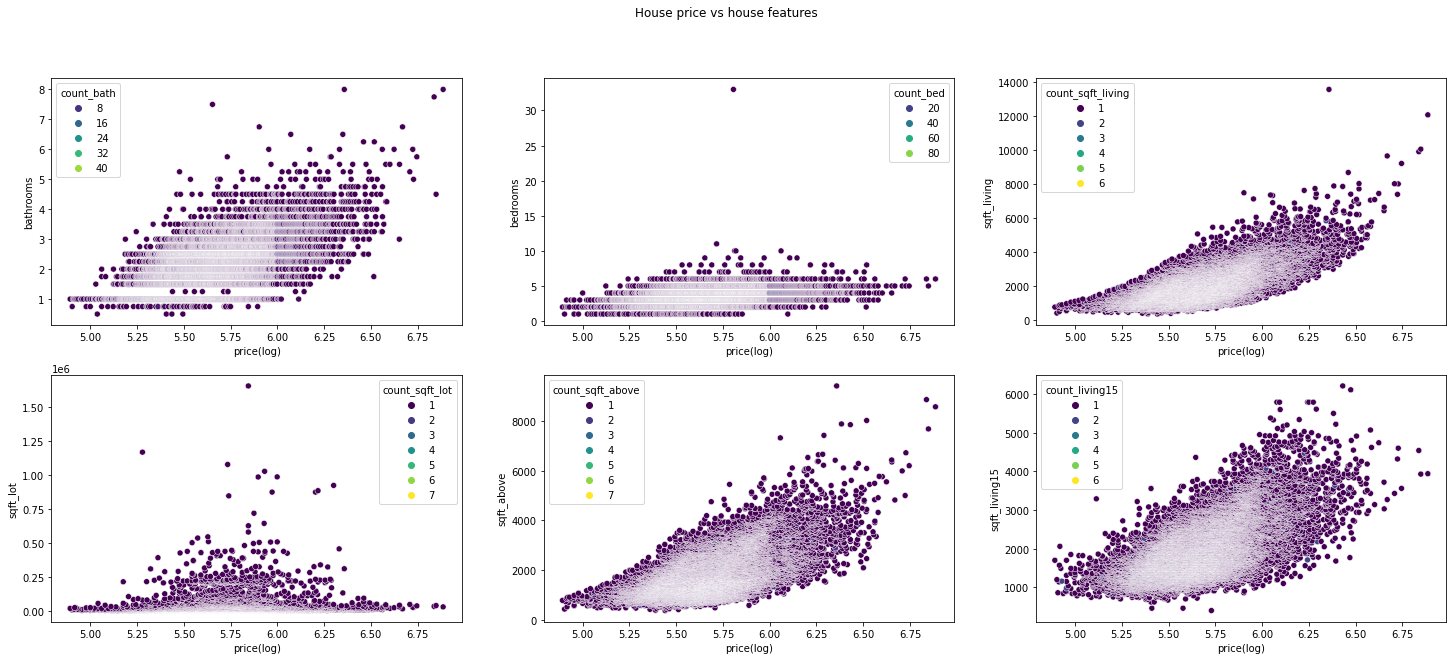

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10))

fig.suptitle('House price vs house features')

sns.scatterplot(ax=axes[0, 0], data=bath_county, x='price(log)', y='bathrooms', hue='count_bath', palette='viridis')
sns.scatterplot(ax=axes[0, 1], data=bed_county, x='price(log)', y='bedrooms', hue='count_bed', palette='viridis')
sns.scatterplot(ax=axes[0, 2], data=sqft_living_county, x='price(log)', y='sqft_living', hue='count_sqft_living', palette='viridis')
sns.scatterplot(ax=axes[1, 0], data=sqft_lot_county, x='price(log)', y='sqft_lot', hue='count_sqft_lot', palette='viridis')
sns.scatterplot(ax=axes[1, 1], data=sqft_living_above_county, x='price(log)', y='sqft_above', hue='count_sqft_above', palette='viridis')
sns.scatterplot(ax=axes[1, 2], data=sqft_living15_county, x='price(log)', y='sqft_living15', hue='count_living15', palette='viridis')

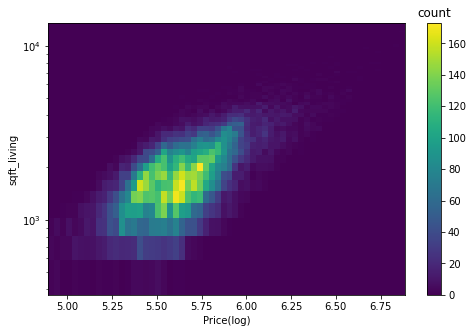

In [17]:
#Lets take a deeper look at the sqft_living and see how the price of the houses are related to the size of the house using a <br>
#a heatmap
plt.hist2d(sqft_living_county['price(log)'], sqft_living_county['sqft_living'], bins=(60, 60))
plt.yscale('log')
plt.xlabel('Price(log)')
plt.ylabel('sqft_living')
clb = plt.colorbar()
clb.ax.set_title('count')
plt.show()

We can see that they are higly correlated and most number of houses with an average number of price have medium size. <br>
Lets make more sense on this later using maps!<br>

But my stakeholder has unlimited budget and hence price doesn't matter. So lets look in to the features of these houses like the size, <br> 
no. of bathrooms, water front etc.. which my stakeholder is interested in!  

Lets look at the no of bathrooms in general

In [18]:
df_bath_new = king_county_df['bathrooms'] > 4
four_plus__bath = king_county_df[df_bath_new]
four_plus__bath.head()

id       date       price  bedrooms  bathrooms  sqft_living  \
5    7237550310 2014-05-12 1230000.000         4      4.500         5420   
270  4054500390 2014-10-07 1370000.000         4      4.750         5310   
300  3225069065 2014-06-24 3080000.000         4      5.000         4550   
419  8678500060 2014-07-10 1550000.000         5      4.250         6070   
450  4055700030 2015-05-02 1450000.000         3      4.500         3970   

     sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
5      101930   1.000       0.000 0.000  ...        3890         1530.0   
270     57346   2.000       0.000 0.000  ...        5310            0.0   
300     18641   1.000       1.000 4.000  ...        2600         1950.0   
419    171626   2.000       0.000 0.000  ...        6070            0.0   
450     24920   2.000       0.000 2.000  ...        3260          710.0   

     yr_built yr_renovated  zipcode    lat     long  sqft_living15  \
5        2001        0.000    98053 47.656 -122.005           4760   
270      1989        0.000    98077 47.728 -122.042           4180   
300      2002        0.000    98074 47.605 -122.077           4550   
419      1999        0.000    98024 47.595 -121.950           4680   
450      1977        0.000    98034 47.718 -122.258           2610   

     sqft_lot15  price(log)  
5        101930       6.090  
270       47443       6.137  
300       19508       6.489  
419      211267       6.190  
450       13838       6.161  

[5 rows x 22 columns]

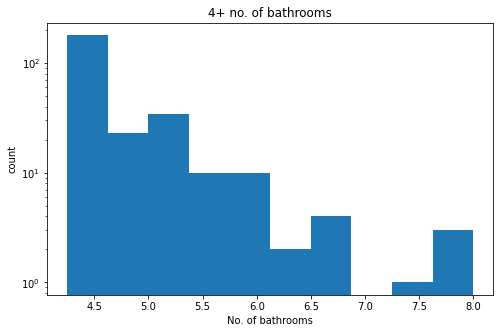

In [19]:
plt.hist(four_plus__bath['bathrooms'])
plt.yscale('log')
plt.xlabel('No. of bathrooms')
plt.ylabel('count')
plt.title('4+ no. of bathrooms')
plt.show()

Lets look at the year of built vs no of bathrooms:

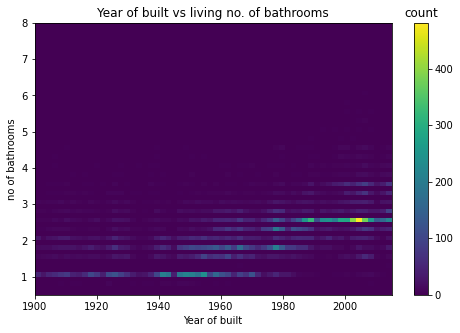

In [20]:
#Lets take a deeper look at the no. of bathrooms and the year in which they are built are related using a heatmap
plt.hist2d(king_county_df['yr_built'], king_county_df['bathrooms'], bins=(60, 60))
#plt.yscale('log')
plt.xlabel('Year of built')
plt.ylabel('no of bathrooms')
plt.title('Year of built vs living no. of bathrooms')
clb = plt.colorbar()
clb.ax.set_title('count')
plt.show()

Lets look in to the relation between year of built and the sqft_living using a heatmap:

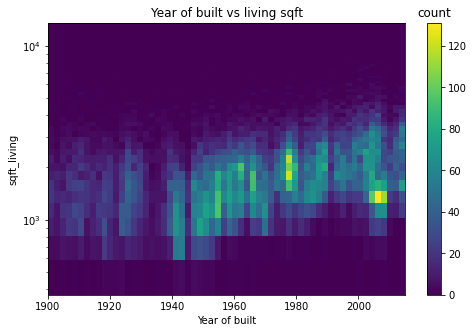

In [21]:
#Lets take a deeper look at the sqft_living and the year in which they are built are related using a heatmap
plt.hist2d(king_county_df['yr_built'], king_county_df['sqft_living'], bins=(60, 60))
plt.yscale('log')
plt.xlabel('Year of built')
plt.ylabel('sqft_living')
plt.title('Year of built vs living sqft')
clb = plt.colorbar()
clb.ax.set_title('count')
plt.show()

We can see that there are more houses which are built in later 90's and most of them has larger size! But at the same time there are some fluctuations in the early years where we can see quite some number of houses with larger size which are built in earlier years. <br>
What can be the reason?

Lets look in to the price and location and year of built in the map to get a better insight to the fluctations!

### Location of houses 

In the below cells, we do different calculations on the housing data and plot the findings in maps with real locations. So that we can <br>
see whether the price and the year in which the houses are built has anything to do with the location of the houses.

<img src="images/map.png" width="800" />

- Surrounded by sea
- So can be highly touristic

In [22]:
#Q3
#Lets get all the columns we are interested in from the original data frame including the year of renovation
bath_county_all = king_county_df[['price', 'yr_built', 'lat', 'long', 'zipcode', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_renovated']]
bath_county_all.head()


price  yr_built    lat     long  zipcode  sqft_living  bathrooms  \
0 221900.000      1955 47.511 -122.257    98178         1180      1.000   
1 538000.000      1951 47.721 -122.319    98125         2570      2.250   
2 180000.000      1933 47.738 -122.233    98028          770      1.000   
3 604000.000      1965 47.521 -122.393    98136         1960      3.000   
4 510000.000      1987 47.617 -122.045    98074         1680      2.000   

   bedrooms  yr_renovated  
0         3         0.000  
1         3      1991.000  
2         2         0.000  
3         4         0.000  
4         3         0.000

Let's plot a map using the location of these houses based on their price.

In [23]:
#using scatter_mapbox from plotly to do that 
fig = px.scatter_mapbox(bath_county_all, lat="lat", lon="long", color="price", hover_data=["yr_built"],
                       color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

<p align="center">
<img src ="images/price_map_annotation.png" width=60% height=50%>
</p>

### Conclusion:<br>
From the above map with the location of the houses and their corresponding price, it doesn't directly show a clear correlation with the location of the houses and the price at which they are sold or bought. But we do see some trend in some areas on the map where the price of most of the houses are expensive compared to other regions(in pink boxes). Based on their locations, points below can explain some of them:
- Metropolitan city
- Home to large tech industry: Amazon & microsoft headquarters in Seattle
- This can be explained using several factors.

Now lets see how the location of the houses and the year in which the houses built looks like! If we see a similar behavior as above, <br> 
we can say that the factors that we accounted from the above plots can are reasonable

Let's plot a map using the location of these houses based on the year in which they are built.

In [24]:
#using scatter_mapbox from plotly to do that 
fig = px.scatter_mapbox(bath_county_all, lat="lat", lon="long", color="yr_built",
                       color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

<p align="center">
<img src ="images/yr_map_anotation.png" width=60% height=50%>
</p>

We do see some contradiction in the interested areas of the houses with their years of built especially in the 'Seattle' region. Comparing the above two maps, there are houses which are built <br> earlier but have higher price and vice versa. What can be the reason?

### Reasonable factors:<br>
- Anything to do with renovation?

Lets look at the renovated houses and its location using a map:<br>
40% of the renovated data are missing. So its hard to make a clear conclusion based on this. But still this can explain some of the fluctuations that <br> we are interested in!

In [25]:
#Creating a new dataframe by droping the missing values, sorting the years and converting it to an int at the end
year_reno = king_county_df.query('yr_renovated != 0').dropna(axis=0, subset=['yr_renovated'])
year_reno.sort_values('yr_renovated', inplace=True)
year_reno['yr_renovated'] = year_reno.yr_renovated.apply(lambda x: int(x));

Let's calculate the number of houses renovated in each of these years!<br>
Hence we can see if the expensive houses built before 1980 are renovated or not! that data can then be used to see the location of those houses in maps. 

<Figure size 576x360 with 0 Axes>

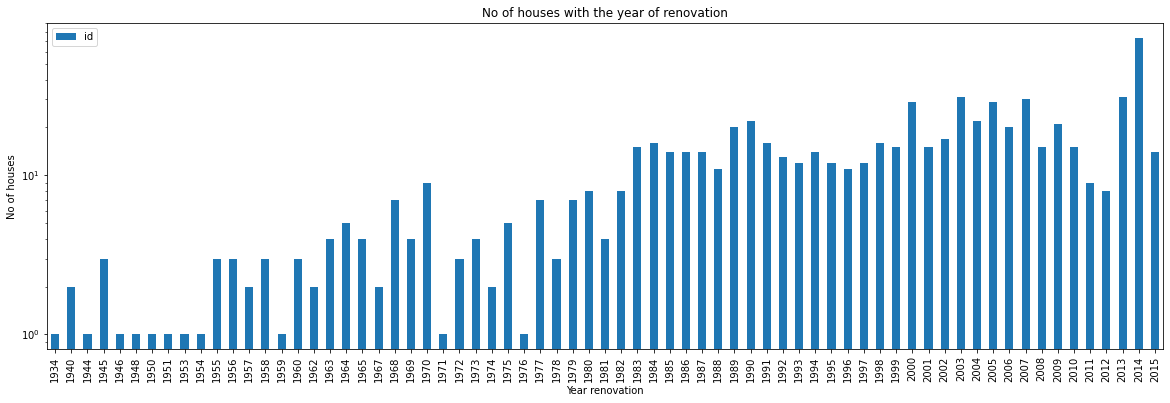

In [40]:
#Ploting the number of houses renovated in each year by counting the number of houses per year
plt.figure()
year_reno_count = year_reno.groupby('yr_renovated').count()

year_reno_count.plot(y='id', kind='bar', figsize=(20, 6))
plt.xlabel('Year renovation')
plt.ylabel('No of houses')
plt.title('No of houses with the year of renovation')
plt.yscale('log')

Clearly shows that more renovations happened during or after 1980's!! This explains the behavior in the fluctuations in the price, where high price for houses built in early years

In [27]:
#location of the houses with the year of renovation
fig = px.scatter_mapbox(year_reno, lat="lat", lon="long", color="yr_renovated",
                       color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

<p align="center">
<img src ="images/renovation_yr_anotation.png" width=60% height=50%>
</p>

Conclusion: Most number of houses did their renovation after the year 1970. This explain the higher price of the houses which are built in the earlier years! At the same time other factors such as recessions that had happened in 1980's and 2008 can explain the lower price of the houses which are built in later years (which shouldn't be the case otherwise)<br>
- 2 main recession period along the years given:
1) Late 20th century (1980-82)
2) Early 21st century (2008-09) : Great recession-

Also renovation and recession itself is correlated. More renovation happens during recession due to various reasons such as:
1) Travel and recreation budget goes to renovation
2) Contractors will be available than before
3) Drop in material pricing 

### Other Reasons<br>
- The houses built in early 90's can be larger or have similar size compared to the ones built in 2000.
- May be the houses that were built in early 90's were extensively renovated later and have similar amenities that today's buyers are seeking


### Map of houses with squarefeet living

In [28]:
map_sqft = king_county_df[['price', 'yr_built', 'lat', 'long', 'zipcode', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_renovated']]

In [29]:
#checking the year condition on the average sqft living on dataset  
#mean sqft_living = 2080.322
sqft_condition =  map_sqft.eval('sqft_mean_condition = sqft_living > 2080.322')
sqft_condition.head() 

price  yr_built    lat     long  zipcode  sqft_living  bathrooms  \
0 221900.000      1955 47.511 -122.257    98178         1180      1.000   
1 538000.000      1951 47.721 -122.319    98125         2570      2.250   
2 180000.000      1933 47.738 -122.233    98028          770      1.000   
3 604000.000      1965 47.521 -122.393    98136         1960      3.000   
4 510000.000      1987 47.617 -122.045    98074         1680      2.000   

   bedrooms  yr_renovated  sqft_mean_condition  
0         3         0.000                False  
1         3      1991.000                 True  
2         2         0.000                False  
3         4         0.000                False  
4         3         0.000                False

In [30]:
#Here we use a mask method to transform the sqft_mean_condition column from bool to a string so that it can directly be used 
#as a legend in the maps below

mask_sqft = sqft_condition.applymap(type) != bool
d_sqft = {True: '> mean_sqft', False: '< mean_sqft'}

sqft_condition = sqft_condition.where(mask_sqft, sqft_condition.replace(d_sqft))
sqft_condition.head()

price  yr_built    lat     long  zipcode  sqft_living  bathrooms  \
0 221900.000      1955 47.511 -122.257    98178         1180      1.000   
1 538000.000      1951 47.721 -122.319    98125         2570      2.250   
2 180000.000      1933 47.738 -122.233    98028          770      1.000   
3 604000.000      1965 47.521 -122.393    98136         1960      3.000   
4 510000.000      1987 47.617 -122.045    98074         1680      2.000   

   bedrooms  yr_renovated sqft_mean_condition  
0         3         0.000         < mean_sqft  
1         3      1991.000         > mean_sqft  
2         2         0.000         < mean_sqft  
3         4         0.000         < mean_sqft  
4         3         0.000         < mean_sqft

In [31]:
#using sqft_condition with binary values(>/< mean) as the value for the 'color' argument so that we can classify the locations 
# in 2 classes with 2 different colours
fig = px.scatter_mapbox(sqft_condition, lat="lat", lon="long", color="sqft_mean_condition",
                       color_discrete_sequence=["red", 'blue'], size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

<p align="center">
<img src ="images/sqft_living.png" width=60% height=50%>
</p>

Conclusion: Marked(in pink) the locations in the map which will be interesting to my stakeholder. Which are far away from waterfront <br>
and which has smaller house nearby

### Map of houses with 4+ bathrooms

In [32]:
#Access the datasets
map_bathroom = king_county_df[['price', 'yr_built', 'lat', 'long', 'zipcode', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_renovated']]

In [33]:
#checking the year condition on the number of bathrooms on dataset  
#no bathroom = 4 : Stakeholder interest
bathroom_condition =  map_bathroom.eval('bathroom_condition = bathrooms > 4')
bathroom_condition.head()

price  yr_built    lat     long  zipcode  sqft_living  bathrooms  \
0 221900.000      1955 47.511 -122.257    98178         1180      1.000   
1 538000.000      1951 47.721 -122.319    98125         2570      2.250   
2 180000.000      1933 47.738 -122.233    98028          770      1.000   
3 604000.000      1965 47.521 -122.393    98136         1960      3.000   
4 510000.000      1987 47.617 -122.045    98074         1680      2.000   

   bedrooms  yr_renovated  bathroom_condition  
0         3         0.000               False  
1         3      1991.000               False  
2         2         0.000               False  
3         4         0.000               False  
4         3         0.000               False

In [34]:
#Here we use a mask method to transform the bathroom_condition column from bool to a string so that it can directly be used 
#as a legend in the maps below

mask_bath = bathroom_condition.applymap(type) != bool
d_bath = {True: '> 4', False: '< 4'}

bathroom_condition = bathroom_condition.where(mask_bath, bathroom_condition.replace(d_bath))
bathroom_condition.head()

price  yr_built    lat     long  zipcode  sqft_living  bathrooms  \
0 221900.000      1955 47.511 -122.257    98178         1180      1.000   
1 538000.000      1951 47.721 -122.319    98125         2570      2.250   
2 180000.000      1933 47.738 -122.233    98028          770      1.000   
3 604000.000      1965 47.521 -122.393    98136         1960      3.000   
4 510000.000      1987 47.617 -122.045    98074         1680      2.000   

   bedrooms  yr_renovated bathroom_condition  
0         3         0.000                < 4  
1         3      1991.000                < 4  
2         2         0.000                < 4  
3         4         0.000                < 4  
4         3         0.000                < 4

In [35]:
#using number of bathroom condition with binary values(>/< mean) as the value for the 'color' argument so that we can classify the locations 
# in 2 classes with 2 different colours
fig = px.scatter_mapbox(bathroom_condition, lat="lat", lon="long", color="bathroom_condition",
                       color_discrete_sequence=["red", 'blue'], size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

<p align="center">
<img src ="images/4_plus_bathrooms.png" width=60% height=50%>
</p>

Conclusion: There are very few houses which has 4+ bathrooms and are far from the waterfront and has smaller houses near by(marked in pink box). 

### My recommendations for my stakeholder will be in the location which is marked in the above box. He can choose any of the houses from the box which are in blue colour: That has 4+ bathrooms, smaller houses nearby and are away from water front!